In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# from sklearn.metrics import silhouette_score

# # 1. Load a part of the LANL data
# # (Adjust the path to where your file is located)
# data = pd.read_csv(
#     '/content/drive/MyDrive/LANL-Earthquake-Prediction/train.csv',
#     dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32},
#     nrows=50000000  # <-- This limits it to 50 million rows
# )

     Values
0  0.000000
1  0.000438
2  0.000857
3  0.001493
4  0.001912


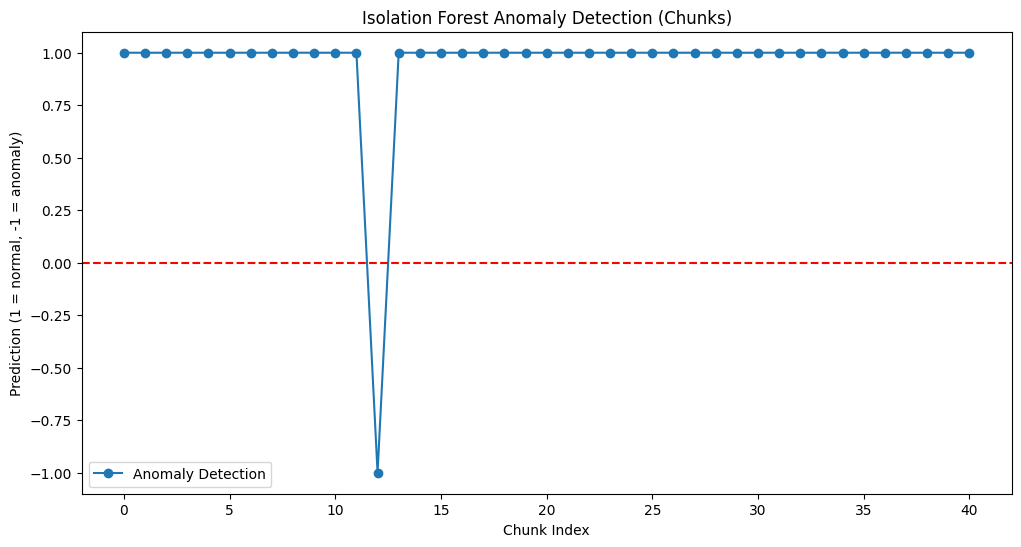

Anomalies detected at chunks: [12]


In [4]:
# # 2. Prepare the data
# # We'll work with chunks because the dataset is huge
# # Example: split into chunks of 150,000 samples
# chunk_size = 150000
# segments = []
# for start in range(0, len(data), chunk_size):
#     end = start + chunk_size
#     if end > len(data):
#         break
#     chunk = data.iloc[start:end]

#     # Simple feature extraction for each chunk
#     features = [
#         chunk['acoustic_data'].mean(),
#         chunk['acoustic_data'].std(),
#         chunk['acoustic_data'].min(),
#         chunk['acoustic_data'].max(),
#         chunk['acoustic_data'].skew(),
#         chunk['acoustic_data'].kurt()
#     ]
#     segments.append(features)

# X = np.array(segments)

# # 3. Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Train Isolation Forest
# model = IsolationForest(contamination=0.01, random_state=42)
# model.fit(X_scaled)

# # 5. Predict anomalies
# predictions = model.predict(X_scaled)
# # -1 = anomaly, 1 = normal

# # 6. Visualize results
# plt.figure(figsize=(12, 6))
# plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Isolation Forest Anomaly Detection (Chunks)')
# plt.xlabel('Chunk Index')
# plt.ylabel('Prediction (1 = normal, -1 = anomaly)')
# plt.legend()
# plt.show()

# # 7. Print anomaly chunks
# anomaly_indices = np.where(predictions == -1)[0]
# print(f"Anomalies detected at chunks: {anomaly_indices}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. Load your file
data = pd.read_csv('/content/drive/MyDrive/EMDATA.csv')  # <-- make sure it's in your working directory or give full path

# Check what it looks like
print(data.head())

# If the CSV has no headers, and just a list of values, you may need:
# data = pd.read_csv('EMDATA.csv', header=None, names=['value'])

# 2. Prepare the data
chunk_size = 150  # you can adjust based on total size
segments = []

for start in range(0, len(data), chunk_size):
    end = start + chunk_size
    if end > len(data):
        break
    chunk = data.iloc[start:end]

    # Feature extraction
    features = [
        chunk.iloc[:, 0].mean(),    # Assuming values are in first column
        chunk.iloc[:, 0].std(),
        chunk.iloc[:, 0].min(),
        chunk.iloc[:, 0].max(),
        chunk.iloc[:, 0].skew(),
        chunk.iloc[:, 0].kurt()
    ]
    segments.append(features)

X = np.array(segments)

# 3. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)

# 5. Predict anomalies
predictions = model.predict(X_scaled)  # -1 = anomaly, 1 = normal

# 6. Visualize results
plt.figure(figsize=(12, 6))
plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
plt.axhline(0, color='red', linestyle='--')
plt.title('Isolation Forest Anomaly Detection (Chunks)')
plt.xlabel('Chunk Index')
plt.ylabel('Prediction (1 = normal, -1 = anomaly)')
plt.legend()
plt.show()

# 7. Print anomaly chunks
anomaly_indices = np.where(predictions == -1)[0]
print(f"Anomalies detected at chunks: {anomaly_indices}")


In [5]:


# # 2. Prepare the data
# # We'll work with chunks because the dataset is huge
# chunk_size = 150
# segments = []

# for start in range(0, len(data), chunk_size):
#     end = start + chunk_size
#     if end > len(data):
#         break
#     chunk = data.iloc[start:end]

#     # Simple feature extraction for each chunk
#     features = [
#         chunk['acoustic_data'].mean(),
#         chunk['acoustic_data'].std(),
#         chunk['acoustic_data'].min(),
#         chunk['acoustic_data'].max(),
#         chunk['acoustic_data'].skew(),
#         chunk['acoustic_data'].kurt()
#     ]
#     segments.append(features)

# X = np.array(segments)

# # 3. Normalize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Train Isolation Forest
# model = IsolationForest(contamination=0.001, random_state=42)
# model.fit(X_scaled)

# # 5. Predict anomalies (basic method)
# predictions = model.predict(X_scaled)
# # -1 = anomaly, 1 = normal

# # 6. Get anomaly scores
# scores = model.decision_function(X_scaled)

# # 7. Plot basic prediction results
# plt.figure(figsize=(12, 6))
# plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Isolation Forest Anomaly Detection (Chunks)')
# plt.xlabel('Chunk Index')
# plt.ylabel('Prediction (1 = normal, -1 = anomaly)')
# plt.legend()
# plt.show()

# # 8. Plot anomaly scores
# plt.figure(figsize=(14, 6))
# plt.plot(scores, marker='o', linestyle='-', label='Anomaly Score')
# plt.axhline(y=np.percentile(scores, 1), color='red', linestyle='--', label='1% threshold')
# plt.title('Anomaly Scores from Isolation Forest')
# plt.xlabel('Chunk Index')
# plt.ylabel('Anomaly Score')
# plt.legend()
# plt.show()

# # 9. Print anomaly chunks
# anomaly_indices = np.where(predictions == -1)[0]
# print(f"Anomalies detected at chunks: {anomaly_indices}")


In [6]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# def detect_anomalies(df, contamination=0.01, chunk_size=150000, true_labels=None, plot_results=True):
#     # 1. Split data into chunks
#     segments = []
#     for start in range(0, len(data), chunk_size):
#         end = start + chunk_size
#         if end > len(data):
#             break
#         chunk = data.iloc[start:end]

#         # Simple feature extraction for each chunk
#         features = [
#             chunk['acoustic_data'].mean(),
#             chunk['acoustic_data'].std(),
#             chunk['acoustic_data'].min(),
#             chunk['acoustic_data'].max(),
#             chunk['acoustic_data'].skew(),
#             chunk['acoustic_data'].kurt()
#         ]
#         segments.append(features)

#     X = np.array(segments)

#     # 2. Normalize the features
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # 3. Train Isolation Forest
#     model = IsolationForest(contamination=contamination, random_state=42)
#     model.fit(X_scaled)

#     # 4. Predict anomalies
#     predictions = model.predict(X_scaled)  # -1 = anomaly, 1 = normal

#     # 5. Optional: Visualize results
#     if plot_results:
#         plt.figure(figsize=(12, 6))
#         plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
#         plt.axhline(0, color='red', linestyle='--')
#         plt.title('Isolation Forest Anomaly Detection (Chunks)')
#         plt.xlabel('Chunk Index')
#         plt.ylabel('Prediction (1 = normal, -1 = anomaly)')
#         plt.legend()
#         plt.show()

#     # 6. Return list of 1 (normal) and -1 (anomalous)
#     return predictions.tolist()


In [8]:
# predictions = detect_anomalies(data, contamination=0.02)
# print(predictions)


In [9]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, f1_score, silhouette_score

# def detect_anomalies(data, contamination=0.01, chunk_size=150000, plot_results=True):
#     # 1. Split data into chunks
#     segments = []
#     for start in range(0, len(data), chunk_size):
#         end = start + chunk_size
#         if end > len(data):
#             break
#         chunk = data.iloc[start:end]

#         features = [
#             chunk['acoustic_data'].mean(),
#             chunk['acoustic_data'].std(),
#             chunk['acoustic_data'].min(),
#             chunk['acoustic_data'].max(),
#             chunk['acoustic_data'].skew(),
#             chunk['acoustic_data'].kurt()
#         ]
#         segments.append(features)

#     X = np.array(segments)

#     # 2. Normalize features
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # 3. Train Isolation Forest
#     model = IsolationForest(contamination=contamination, random_state=42)
#     model.fit(X_scaled)

#     # 4. Predict anomalies
#     predictions = model.predict(X_scaled)  # -1 = anomaly, 1 = normal
#     predictions = np.where(predictions == 1, 0, 1)  # 0 = normal, 1 = anomaly

#     # 5. Plot results
#     if plot_results:
#         plt.figure(figsize=(12, 6))
#         plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
#         plt.axhline(0.5, color='red', linestyle='--')
#         plt.title('Isolation Forest Anomaly Detection (Chunks)')
#         plt.xlabel('Chunk Index')
#         plt.ylabel('Prediction (0 = normal, 1 = anomaly)')
#         plt.legend()
#         plt.show()

#     # 6. Compute confusion matrix and F1 score based on predictions
#     normal_baseline = np.zeros_like(predictions)  # Assume all data was "normal" as baseline

#     # 7. Compute Silhouette Score (unsupervised clustering quality)
#     sil_score = silhouette_score(X_scaled, predictions)
#     print(f"\nSilhouette Score (unsupervised cluster separation): {sil_score:.4f}")

#     # 8. Return 0/1 list
#     return predictions.tolist()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, silhouette_score

def detect_anomalies(data, contamination=0.01, chunk_size=150, plot_results=True):
    # 1. Split data into chunks
    segments = []
    for start in range(0, len(data), chunk_size):
        end = start + chunk_size
        if end > len(data):
            break
        chunk = data.iloc[start:end]

        features = [
            chunk.iloc[:, 0].mean(),    # Assume values are in the first column (column 0)
            chunk.iloc[:, 0].std(),
            chunk.iloc[:, 0].min(),
            chunk.iloc[:, 0].max(),
            chunk.iloc[:, 0].skew(),
            chunk.iloc[:, 0].kurt()
        ]
        segments.append(features)

    X = np.array(segments)

    # 2. Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Train Isolation Forest
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X_scaled)

    # 4. Predict anomalies
    predictions = model.predict(X_scaled)  # -1 = anomaly, 1 = normal
    predictions = np.where(predictions == 1, 0, 1)  # 0 = normal, 1 = anomaly

    # 5. Plot results
    if plot_results:
        plt.figure(figsize=(12, 6))
        plt.plot(predictions, marker='o', linestyle='-', label='Anomaly Detection')
        plt.axhline(0.5, color='red', linestyle='--')
        plt.title('Isolation Forest Anomaly Detection (Chunks)')
        plt.xlabel('Chunk Index')
        plt.ylabel('Prediction (0 = normal, 1 = anomaly)')
        plt.legend()
        plt.show()

    # 6. Compute confusion matrix and F1 score assuming all data was normal
    normal_baseline = np.zeros_like(predictions)  # Assume true labels are all normal (0)

    # 7. Compute Silhouette Score (unsupervised cluster separation quality)
    sil_score = silhouette_score(X_scaled, predictions)
    print(f"\nSilhouette Score (unsupervised cluster separation): {sil_score:.4f}")

    # 8. Return predictions (0 = normal, 1 = anomaly)
    return predictions.tolist()


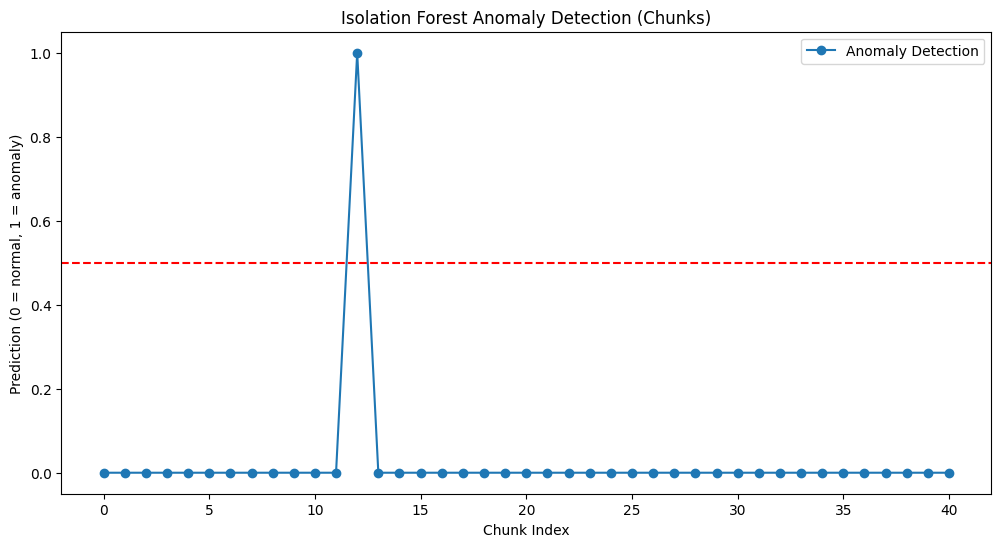


Silhouette Score (unsupervised cluster separation): 0.7455
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
predictions = detect_anomalies(data, contamination=0.02)
print(predictions)
